In [328]:
from simulation import Voter, Community
import random as rnd

In [329]:
def sim_create_comm(num_voters):
    Person = 0
    Blue_Limit = .52 #
    Red_Limit = .97
    Grey_Limit = 1
    Total_Blues = 0
    Total_Reds = 0
    Total_Greys = 0
    Total_Lean = ""
    community = Community()

    while Person < num_voters:
        number = rnd.random()
        if number < Blue_Limit:
            lean = "+"
            Blue_Limit_New = .7
            Red_Limit_New = .97
            Grey_Limit_New = 1
            Total_Blues = Total_Blues + 1
        elif number < Red_Limit:
            lean = "-"
            Blue_Limit_New = .32
            Red_Limit_New = .97
            Grey_Limit_New = 1
            Total_Reds = Total_Reds + 1
        else:
            lean = "?"
            Blue_Limit_New = .45
            Red_Limit_New = .9
            Grey_Limit_New = 1
            Total_Greys = Total_Greys + 1
        v = Voter(lean) #?
        community.Add_Voter(v)
        Blue_Limit = Blue_Limit_New
        Red_Limit = Red_Limit_New
        Grey_Limit = Grey_Limit_New
        Total_Lean = Total_Lean + lean
        Person = Person + 1
    return community


In [330]:
def sim_sequential_split(comm_obj, num_distr, seq_size):
    #divides by given value
    # Iteratively compose each district
    for i in range(0, num_distr):
        #define a district
        D = Community()
        #assign the proper voters to the proper district (voters 0 through 9 to District 1, voters 10 through 19 to District 2, etc...)
        D.voter_list = comm_obj.voter_list[i*seq_size : i*seq_size + seq_size]
        comm_obj.Add_District(D)
    return comm_obj

In [331]:
def sim_shuffled_seq_split(comm_obj, num_distr, seq_size):
    # Shuffle voter list first
    rnd.shuffle(comm_obj.voter_list)
    # Iteratively compose each district
    for i in range(0, num_distr):
        #define a district
        D = Community()
        #assign the proper voters to the proper district (voters 0 through 9 to District 1, voters 10 through 19 to District 2, etc...)
        D.voter_list = comm_obj.voter_list[i*seq_size : i*seq_size + seq_size]
        comm_obj.Add_District(D)
    return comm_obj

In [332]:
def sim_step_split(comm_obj, comm_size, num_distr, step_size):
    # Iteratively compose each district 
    for i in range(0, num_distr):
        
        # Define a district
        D = Community()
        # Update voter index for next district starting at i
        voter_index = i
        # Iterate through the community.voter_list (1D)
        while voter_index < comm_size:
            # Pick a voter: one in every step_size 
            # Append to voter_ls
            D.voter_list.append(comm_obj.voter_list[voter_index])
            # Update voter index
            voter_index = voter_index + step_size
      
        # Add district into community district list
        comm_obj.Add_District(D)

    # Return the Community object
    return comm_obj

In [333]:
def sim_shuffled_step_split(comm_obj, comm_size, num_distr, step_size):
   
    # Shuffle community voter list first
    rnd.shuffle(comm_obj.voter_list)
    # Iteratively compose each district 
    for i in range(0, num_distr):
        
        # Define a district
        D = Community()
        # Update voter index for next district starting at i
        voter_index = i
        
        # Iterate through the community.voter_list (1D)
        while voter_index < comm_size:
            # Pick a voter: one in every step_size 
            # Append to voter_ls
            D.voter_list.append(comm_obj.voter_list[voter_index])
            # Update voter index
            voter_index = voter_index + step_size
        # District will hold this list of voters
        
        # Add district into community district list
        comm_obj.Add_District(D)
        
    # Return the Community object
    return comm_obj

In [334]:
def show_distr_result(comm_obj):
    for D in comm_obj.voter_districts:
        print(D.Get_Voter_String())
        print(D.Get_Community_Lean())

In [335]:
def show_comm_result(comm_obj):
    districts_leaning_blue = 0
    districts_leaning_red = 0
    districts_leaning_grey = 0

    for d in comm_obj.voter_districts: # voter_districts after split
        if d.Get_Community_Lean() == "Blue":
            districts_leaning_blue = districts_leaning_blue + 1
        elif d.Get_Community_Lean() == "Red":
            districts_leaning_red = districts_leaning_red + 1
        elif d.Get_Community_Lean() == "Grey":
            districts_leaning_grey = districts_leaning_grey + 1

    districts_lean = ""
    if districts_leaning_blue >= districts_leaning_red and districts_leaning_blue >= districts_leaning_grey:
        districts_lean = "Blue"
    elif districts_leaning_red >= districts_leaning_blue and districts_leaning_red >= districts_leaning_grey:
        districts_lean = "Red"
    elif districts_leaning_grey >= districts_leaning_blue and districts_leaning_grey >= districts_leaning_red:
        districts_lean = "Grey"

    print("\t\t\tPlus\tMinus\tIndep")
    print("Community leaning:", comm_obj.Get_Community_Lean(), comm_obj.voter_lean_blue, "\t", comm_obj.voter_lean_red, "\t", comm_obj.voter_lean_grey)
    print("Districts leaning:", districts_lean, districts_leaning_blue, "\t", districts_leaning_red, "\t", districts_leaning_grey)

In [336]:
def show_comm_before_split(community):
    print()
    print(community.Get_Voter_String())
    print(community.Get_Community_Lean(), community.voter_lean_blue, community.voter_lean_red, community.voter_lean_grey)
print()

In [340]:
# number of districts
num_district = 10
# community size:
com_size = 100 # len(community.voter_list)
# step size
step = 10

C2 = sim_create_comm(com_size)
show_comm_before_split(C2)
C3 = sim_step_split(C2, com_size, num_district, step)

print("Simulation Step Split result:")

show_distr_result(C3)
show_comm_result(C3)




+++-++--++-++--++-+?+++++++++-?-++?--++++++++-+--?+++++++--+?---+++-?-------+?++-+---?----++++++++--
Blue 55 37 8
Simulation Step Split result:

Blue

Blue

Blue

Blue

Blue

Blue

Blue

Blue

Blue

Blue
			Plus	Minus	Indep
Community leaning: Blue 55 	 37 	 8
Districts leaning: Blue 10 	 0 	 0


In [338]:
C1 = sim_create_comm(com_size)
C1 = sim_sequential_split(C1, num_district, step)
print("Sequential Split Result:")
show_distr_result(C1)
show_comm_result(C1) 

Sequential Split Result:
+++++++--?
Blue
--++---++-
Red
+------+--
Red
?-+++++---
Blue
?++---+---
Red
-+---+-+--
Red
--++-+++++
Blue
+-?+++++++
Blue
+++++++++-
Blue
--+-++-+++
Blue
			Plus	Minus	Indep
Community leaning: Blue 54 	 42 	 4
Districts leaning: Blue 6 	 4 	 0


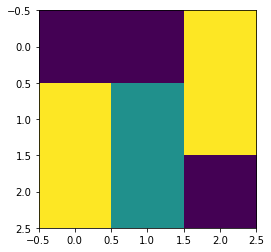

In [339]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# example: -1 (minus); 0 (neutral); 1 (plus) 
X = np.array([[-1, -1, 1],
            [1, 0, 1],
            [1, 0, -1]
                    ]) # our 2-D goes here instead of np.random

fig, ax = plt.subplots()
ax.imshow(X)

numrows, numcols = X.shape


def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if 0 <= col < numcols and 0 <= row < numrows:
        z = X[row, col]
        return 'x=%1.5f, y=%1.5f, z=%1.0f' % (x, y, z)
    else:
        return 'x=%2.0f, y=%2.0f' % (x, y)

ax.format_coord = format_coord
plt.show()